<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/%EC%9C%A0%EC%9E%AC%EB%AA%85_%EA%B0%95%EC%82%AC_%ED%86%B5%EA%B3%84_%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_excel('./sample_data/GOOG.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-03-28,558.46,559.66,564.88,557.14,41.12K,0.0027
1,2014-03-31,555.45,565.34,565.45,555.41,10.80K,-0.0054
2,2014-04-01,565.61,557.18,566.89,557.18,7.95K,0.0183
3,2014-04-02,565.45,598.35,603.17,560.65,147.10K,-0.0003
4,2014-04-03,568.18,568.29,585.67,562.59,5.10M,0.0048


In [10]:
df.Date=pd.to_datetime(df.Date) # Date를 날짜와 시간 형식으로 바꿔서 다시 덮어씀

In [11]:
df.set_index('Date', inplace=True) # df의 인덱스(행 번호)를 Date로 바꿔라
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2014-03-28,558.46,559.66,564.88,557.14,41.12K,0.0027
2014-03-31,555.45,565.34,565.45,555.41,10.80K,-0.0054
2014-04-01,565.61,557.18,566.89,557.18,7.95K,0.0183
2014-04-02,565.45,598.35,603.17,560.65,147.10K,-0.0003
2014-04-03,568.18,568.29,585.67,562.59,5.10M,0.0048
...,...,...,...,...,...,...
2021-12-27,2961.28,2949.27,2968.53,2945.00,660.69K,0.0063
2021-12-28,2928.96,2967.49,2967.49,2918.71,912.40K,-0.0109
2021-12-29,2930.09,2928.59,2943.68,2910.09,839.10K,0.0004


<Axes: xlabel='Date'>

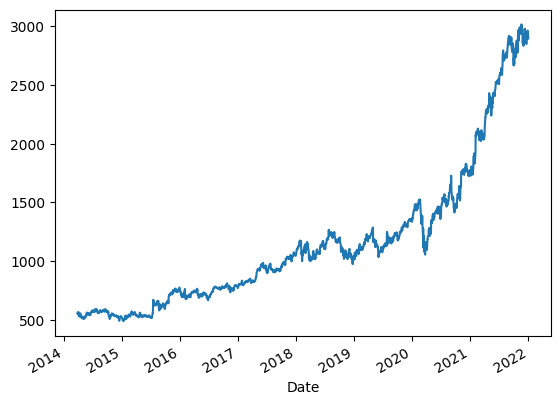

In [12]:
df.Price.plot()

<Axes: xlabel='Date'>

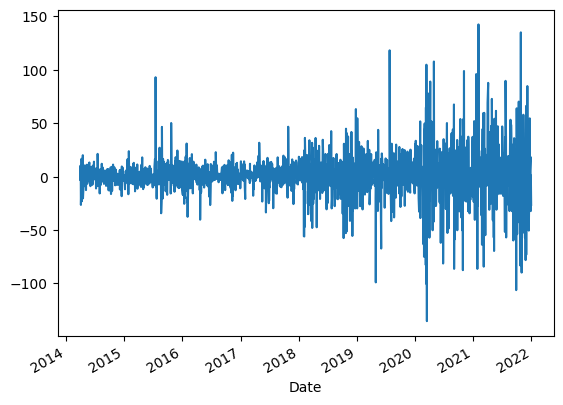

In [14]:
df.Price.diff().plot()

<Axes: xlabel='Date'>

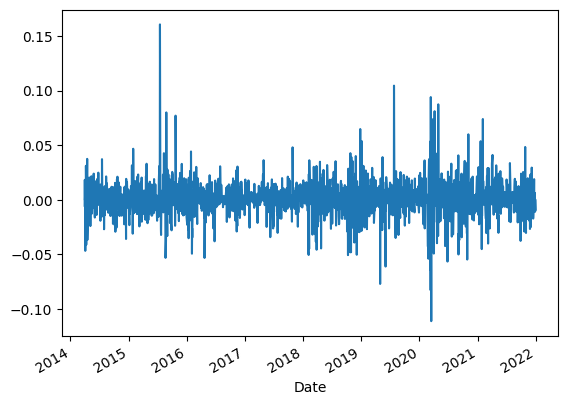

In [15]:
df.Price.pct_change().plot()

In [17]:
df.Price.asfreq('AS', method='bfill') # 뒷 날 중에 첫 데이터를 당겨옴

Date
2015-01-01     523.37
2016-01-01     741.84
2017-01-01     786.14
2018-01-01    1065.00
2019-01-01    1045.85
2020-01-01    1367.37
2021-01-01    1728.24
Freq: AS-JAN, Name: Price, dtype: float64

<Axes: xlabel='Date'>

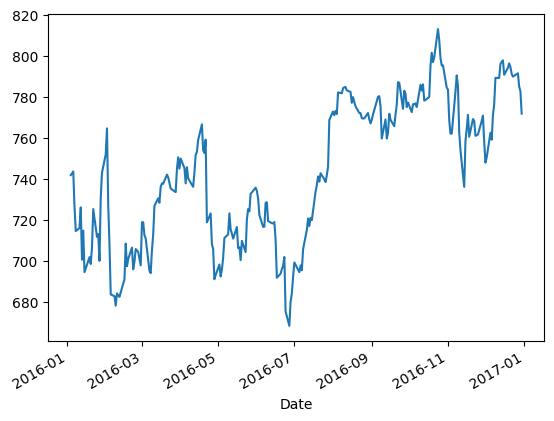

In [20]:
df.Price['2016'].plot()

<Axes: xlabel='Date'>

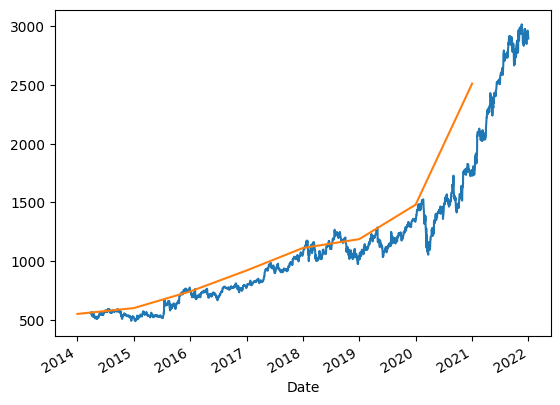

In [23]:
df.Price.plot() # 매일 매일 가
df.Price.asfreq('AS', method='bfill') # 첫 날 가격
df.Price.resample('AS').mean().plot() # 연평균


In [28]:
rolling=df.Price.rolling(365, center=True)

<Axes: xlabel='Date'>

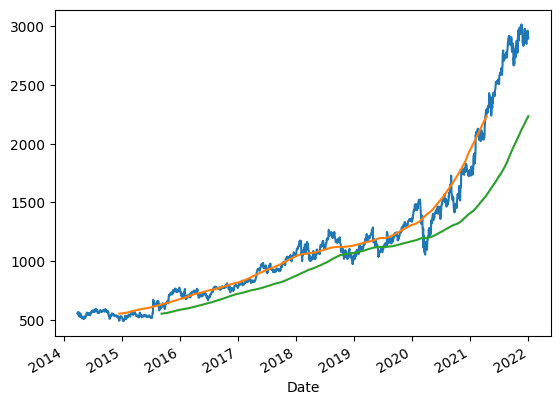

In [29]:
df.Price.plot()
df.Price.rolling(365, center=True).mean().plot() # 365개의 데이터가 있는 날짜부터 롤링이 가능 / center는 롤링 값을 가운데 날짜에 넣어줘
df.Price.rolling(365).mean().plot()

In [35]:
import pandas as pd
data = pd.read_csv('./sample_data/bicycle.csv')
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [37]:
data = pd.read_csv(
'./sample_data/bicycle.csv',
index_col='Date', # Date 컬럼을 인덱스로 지정
parse_dates=True) # 자동으로 날짜 처리
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [38]:
data.columns = ['Total', 'East', 'West']
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<Axes: xlabel='Date'>

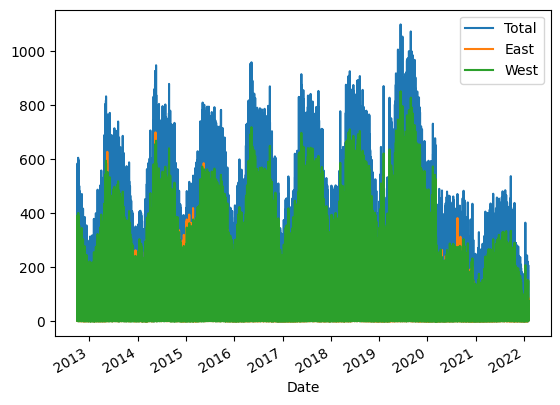

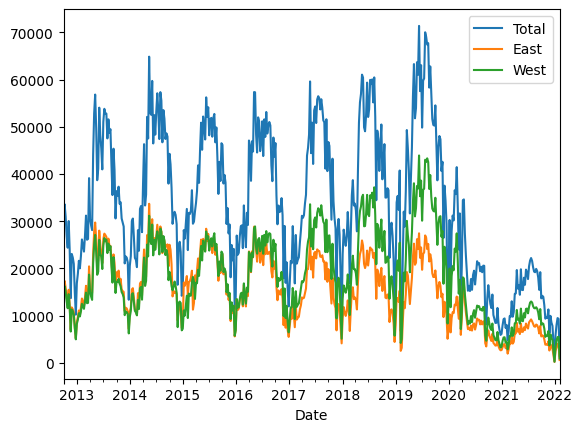

In [40]:
data.plot()
data.resample('W').sum().plot()